<a href="https://colab.research.google.com/github/snikhil17/NLP_Simplilearn/blob/main/Capstone_Project_1_review_project_analysis/Review_Project_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1: Review Project Analysis.**

## **DESCRIPTION**
- Help a leading mobile brand understand the voice of the customer by analyzing the reviews of their product on Amazon and the topics that customers are talking about. 
- You will perform topic modeling on specific parts of speech. You’ll finally interpret the emerging topics.

## **Problem Statement:**

- A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. 
- The client wants to understand the VOC (voice of the customer) on the product. 
- This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. 
- The client is particularly interested in the different aspects that customers care about. 
- Product reviews by customers on a leading e-commerce site should provide a good view.

**Domain: Amazon reviews for a leading phone brand**

**Analysis to be done:** 
- POS tagging, topic modeling using LDA, and topic interpretation

## **Data Dictionary**
- **Sentiment:** The sentiment against the review (4,5 star reviews are positive, 1,2 are negative)
- **Reviews:** The main text of the review

## **Steps to perform:**
- Discover the topics in the reviews and present it to business in a consumable format. Employ techniques in syntactic processing and topic modeling.
- Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA. Finally, give business-friendly names to the topics and make a table for business.

### **Tasks:** 
- Read the .csv file using Pandas. Take a look at the top few records.
- Normalize casings for the review text and extract the text into a list for easier manipulation.
- Tokenize the reviews using NLTKs word_tokenize function.
- Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.
- For the topic model, we should  want to include only nouns.
- Find out all the POS tags that correspond to nouns.
- Limit the data to only terms with these tags.

**Lemmatize.**
- Different forms of the terms need to be treated as one.
- No need to provide POS tag to lemmatizer for now.
- Remove stopwords and punctuation (if there are any). 
- Create a topic model using LDA on the cleaned-up data with 12 topics.
- Print out the top terms for each topic.
- What is the coherence of the model with the c_v metric?
- Analyze the topics through the business lens.
- Determine which of the topics can be combined.

**Create topic model using LDA with what you think is the optimal number of topics**
- What is the coherence of the model?
- The business should  be able to interpret the topics.
- Name each of the identified topics.
- **Create a table with the topic name and the top 10 terms in each to present to the  business.**

## **Loading Required Libraries**

In [148]:
!pip install pyspellchecker

In [149]:
!wget https://raw.githubusercontent.com/snikhil17/NLP_Simplilearn/main/Capstone_Project_1_review_project_analysis/K8%20Reviews%20v0.2.csv

--2022-01-03 10:18:58--  https://raw.githubusercontent.com/snikhil17/NLP_Simplilearn/main/Capstone_Project_1_review_project_analysis/K8%20Reviews%20v0.2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712800 (1.6M) [text/plain]
Saving to: ‘K8 Reviews v0.2.csv.2’

K8 Reviews v0.2.csv 100%[===================>]   1.63M  --.-KB/s    in 0.06s   

2022-01-03 10:18:58 (28.6 MB/s) - ‘K8 Reviews v0.2.csv.2’ saved [1712800/1712800]



In [150]:
!pip install pyLDAvis

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer

from nltk.corpus import wordnet
import string
nltk.download('punkt')

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from spellchecker import SpellChecker

#Visualizing the LDA model
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
from gensim.corpora import Dictionary

from IPython.display import clear_output

import pyLDAvis.gensim_models as gensim_models
from gensim.models.coherencemodel import CoherenceModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Loading Data**

In [152]:
df = pd.read_csv("K8 Reviews v0.2.csv")
print(f"Shape of the Data: {df.shape}")
df.head()

Shape of the Data: (14675, 2)


,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


## **Checking Missing Values**

In [153]:
print(f"Number of Null Values: {df.isnull().sum().sum()}")

Number of Null Values: 0


## **Data is balanced?** 

In [154]:
df.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

**Observation:**
- Data is imbalanced.

## **Text Preprocessing:**
- Processing texts using regex
- Redefining English Stopwords
- Only selecting Nouns and Tokenization
- Lemmatization, Checking & correcting spellings and selected words which are more than 3 characters
- Dropping rows who doesn't have any words after preprocessing 

In [155]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase.lower()

df['review'] = df['review'].apply(lambda x: decontracted(x))

## **Redifining English Stopwords**

In [156]:
# Remove words like 'nor', 'not', 'no' from stop_words
stop_words = stopwords.words('english')

for i in ['nor', 'not', 'no']:
  stop_words.remove(i)

punc = list(string.punctuation)
stop_words += punc

## **Only selecting Nouns and Tokenization**

In [157]:
lemmaObject = WordNetLemmatizer()
def only_noun(docs):
  noun_docs = []  
  for word in docs:
    if nltk.pos_tag(word.split())[0][1]  in ['NN', 'NNP', 'NNPS', 'NNS',]:
      noun_docs.append(word)
  return " ".join(noun_docs)

df.review = df.review.apply(lambda x: nltk.word_tokenize(x))
df.review = df.review.apply(only_noun)

df.review.head()

0                            need updates improvements
1    mobile i bought battery hell backup hours inte...
2                                   i % cash january..
3                                                     
4     phone everthey phone problem amazon phone amazon
Name: review, dtype: object

## **Lemmatization, Checking & correcting spellings and selected words which are more than 3 characters**

In [158]:
spell = SpellChecker(distance=1)
def Preprocessing(docs):
  temp_docs = []
  lemma_word = lemmaObject.lemmatize(docs)
  # print(lemma_word)
  vocab = spell.correction(lemma_word)
  # print(vocab)
  for word in vocab.split():
    if word not in stop_words and len(word) > 3:
      temp_docs.append(word)
  
  return temp_docs

In [159]:
df['org_review'] = df.review
df['review'] = df.review.apply(Preprocessing)

In [160]:
df.head()

,sentiment,review,org_review
0,1,"[need, updates, improvements]",need updates improvements
1,0,"[mobile, bought, battery, hell, backup, hours,...",mobile i bought battery hell backup hours inte...
2,1,"[cash, january..]",i % cash january..
3,1,[],
4,0,"[phone, everthey, phone, problem, amazon, phon...",phone everthey phone problem amazon phone amazon


In [161]:
# lemmaObject = WordNetLemmatizer()

# """Helper function for lemmatization_check"""
# def get_wordnet_pos(tag):
#     if tag.startswith('N'):
#         return wordnet.NOUN
#     else:
#       pass
#     # elif tag.startswith('V'):
#     #     return wordnet.VERB
#     # elif tag.startswith('N'):
#     #     return wordnet.NOUN
#     # elif tag.startswith('R'):
#     #     return wordnet.ADV
#     # else:
#     #     return wordnet.NOUN

# def textPreprocessing(document):

#   # rows = [nltk.word_tokenize(title) for title in document]
#   # print("Tokens: ", rows)
#   # wordNoun = [word for words in rows for word in words if nltk.pos_tag(word.split())[0][1].startswith('NN')]
#   # print("Nouns: ", wordNoun)
#   lemma_words = [lemmaObject.lemmatize(word) for word in wordNoun]
#   # print("Lemma: ",lemma_words)
#   no_stop_words = [word for word in lemma_words if word not in stop_words]
#   # print("NO Stop words: ", no_stop_words)
#   no_punct = [char for char in no_stop_words  if char not in string.punctuation]
#   # print("no_punct: ", no_punct)
#   spell = SpellChecker(distance=1)
#   vocabulary = [spell.correction(word) for word in no_punct if len(word) > 3]
#   # print("vocabs: ",vocabulary)
#   return vocabulary

## **Dropping rows who doesn't have any words after preprocessing** 

In [162]:
df = df[df['review'].map(lambda x: len(x)) > 1].reset_index(drop=True)

In [163]:
df.head()

,sentiment,review,org_review
0,1,"[need, updates, improvements]",need updates improvements
1,0,"[mobile, bought, battery, hell, backup, hours,...",mobile i bought battery hell backup hours inte...
2,1,"[cash, january..]",i % cash january..
3,0,"[phone, everthey, phone, problem, amazon, phon...",phone everthey phone problem amazon phone amazon
4,0,"[buyi, disappointedpoor, batterypoor, camerawa...",i buyi disappointedpoor batterypoor camerawast...


## **Separating Features and Labels**

In [164]:
features = df['review'].values
labels = df['sentiment'].values

## **Document Term Matrix (BoW)**

In [165]:
np.random.seed(100)
dictionary = Dictionary(features)
print(dictionary)

Dictionary(13658 unique tokens: ['improvements', 'need', 'updates', 'amazon', 'backup']...)


In [166]:
doc_term_matrix = df['review'].apply(lambda x: dictionary.doc2bow(x))
doc_term_matrix[:10]

0                             [(0, 1), (1, 1), (2, 1)]
1    [(3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1...
2                                   [(22, 1), (23, 1)]
3                  [(3, 2), (24, 1), (25, 3), (26, 1)]
4        [(27, 1), (28, 1), (29, 1), (30, 1), (31, 1)]
5    [(16, 1), (25, 1), (32, 1), (33, 1), (34, 1), ...
6                           [(5, 1), (38, 1), (39, 1)]
7    [(16, 2), (25, 2), (36, 1), (40, 1), (41, 1), ...
8                 [(47, 1), (48, 1), (49, 1), (50, 1)]
9                  [(9, 1), (25, 1), (51, 1), (52, 1)]
Name: review, dtype: object

## **Latent Dirichlet Allocation(LDA)**

In [167]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=12, id2word=dictionary, passes=10,random_state=45)
clear_output()

In [168]:
ldamodel.print_topics()

[(0,
  '0.030*"device" + 0.026*"feature" + 0.026*"dolby" + 0.016*"atmos" + 0.012*"audio" + 0.011*"speakers" + 0.010*"sound" + 0.010*"earphones" + 0.009*"connect" + 0.009*"screen"'),
 (1,
  '0.184*"camera" + 0.089*"quality" + 0.038*"battery" + 0.024*"front" + 0.023*"phone" + 0.022*"performance" + 0.018*"mode" + 0.018*"rear" + 0.018*"depth" + 0.010*"backup"'),
 (2,
  '0.374*"mobile" + 0.015*"charger" + 0.009*"broken" + 0.008*"headphone" + 0.007*"change" + 0.007*"time" + 0.006*"delivery" + 0.006*"super" + 0.005*"send" + 0.005*"contact"'),
 (3,
  '0.142*"battery" + 0.085*"heating" + 0.077*"problem" + 0.075*"phone" + 0.041*"issue" + 0.030*"backup" + 0.028*"fast" + 0.021*"charge" + 0.018*"issues" + 0.016*"network"'),
 (4,
  '0.045*"phone" + 0.020*"earphone" + 0.018*"condition" + 0.013*"specifications" + 0.012*"lenova" + 0.011*"user" + 0.009*"performance" + 0.009*"package" + 0.009*"damage" + 0.009*"head"'),
 (5,
  '0.106*"money" + 0.045*"waste" + 0.042*"value" + 0.037*"glass" + 0.033*"worth" 

In [169]:
pyLDAvis.enable_notebook()
vis = gensim_models.prepare(ldamodel,doc_term_matrix,dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.100162  0.107273       1        1  13.133449
3      0.206147  0.015984       2        1  13.071514
1      0.152807 -0.246752       3        1  11.800807
7      0.161636 -0.135716       4        1  10.986172
6      0.053562  0.229815       5        1  10.933252
8      0.069848 -0.020041       6        1   9.996672
10     0.054570  0.207547       7        1   7.440427
9     -0.138207 -0.036090       8        1   5.081529
0     -0.161877 -0.063673       9        1   4.768213
2     -0.193308 -0.000045      10        1   4.744457
5     -0.183812 -0.015700      11        1   4.701324
4     -0.121529 -0.042602      12        1   3.342184, topic_info=            Term         Freq        Total Category  logprob  loglift
17        mobile  1815.000000  1815.000000  Default  30.0000  30.0000
82        camera  2779.000000  2779.000000  Default  29.0000  29.0000
72       product  1539.000000  1539.000000  Default  28.0000  28.0000
5        battery  2779.000000  2779.000000  Default  27.0000  27.0000
53       heating  1131.000000  1131.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
25         phone   153.822510  5511.751942  Topic12  -3.0997  -0.1803
196       weight    17.761069    48.412148  Topic12  -5.2585   2.3958
821    interface    15.091144    43.652973  Topic12  -5.4214   2.3364
112  performance    31.083330   730.707730  Topic12  -4.6989   0.2412
80       speaker    12.607027   232.902873  Topic12  -5.6013   0.4822

[732 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2381      2  0.933441     ..and
1090      2  0.911725  ..camera
3364      5  0.952807      ..it
1397      4  0.917747     ..not
624       2  0.723491      .and
...     ...       ...       ...
296       5  0.261495      year
296       7  0.724140      year
46        1  0.960601     years
336       9  0.962036    yellow
551       3  0.975926      zoom

[1213 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 4, 2, 8, 7, 9, 11, 10, 1, 3, 6, 5])

### **Since some topics are overlapping, we need different number of topics**


In [170]:
#Finding out coherence of the model
coherence_model_lda = CoherenceModel(model=ldamodel,texts=df['review'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())


Coherence Score:  0.5427454386158687


In [171]:
# Computing coherence score for different size of topic
def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts, dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

topic_num,cv_score = calculate_topic_cv(ldamodel,df['review'],dictionary,15)

In [172]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
5,0.548933
12,0.542745
4,0.541805
3,0.537079
7,0.525588
9,0.519495
6,0.518875
14,0.515620
11,0.506616


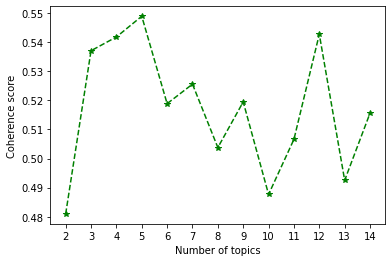

In [173]:
plt.plot(topic_num,cv_score,color='green', marker='*', linestyle='dashed')
plt.xticks(range(2,15))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

In [174]:
# Creating LDA model with number of topics as 6
Lda2 = gensim.models.ldamodel.LdaModel
ldamodel2 = Lda2(doc_term_matrix, num_topics=6, id2word=dictionary, passes=10,random_state=45)
clear_output()
print(CoherenceModel(model=ldamodel2,texts=df['review'],dictionary=dictionary , coherence='c_v').get_coherence())

0.5188747005158144


In [175]:
ldamodel2.print_topics()

[(0,
  '0.034*"call" + 0.021*"screen" + 0.015*"cast" + 0.013*"option" + 0.011*"support" + 0.011*"network" + 0.009*"connect" + 0.008*"volte" + 0.008*"feature" + 0.008*"work"'),
 (1,
  '0.096*"camera" + 0.066*"phone" + 0.040*"quality" + 0.024*"note" + 0.022*"lenovo" + 0.022*"battery" + 0.019*"awesome" + 0.018*"performance" + 0.014*"mobile" + 0.012*"price"'),
 (2,
  '0.052*"mobile" + 0.042*"amazon" + 0.040*"lenovo" + 0.038*"phone" + 0.025*"product" + 0.024*"service" + 0.018*"return" + 0.016*"note" + 0.013*"charger" + 0.012*"delivery"'),
 (3,
  '0.087*"battery" + 0.070*"phone" + 0.046*"heating" + 0.043*"problem" + 0.032*"issue" + 0.019*"product" + 0.018*"fast" + 0.017*"charge" + 0.015*"backup" + 0.015*"time"'),
 (4,
  '0.033*"phone" + 0.015*"speaker" + 0.014*"screen" + 0.011*"processor" + 0.011*"lenovo" + 0.009*"sensor" + 0.008*"display" + 0.008*"side" + 0.007*"core" + 0.007*"sound"'),
 (5,
  '0.076*"phone" + 0.043*"money" + 0.039*"price" + 0.039*"product" + 0.024*"worth" + 0.023*"mobile" 

In [176]:
vis2 = gensim_models.prepare(ldamodel2,doc_term_matrix,dictionary)
vis2

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.126496  0.058454       1        1  28.517469
3     -0.170449 -0.125431       2        1  24.575757
2     -0.051198 -0.127797       3        1  17.332805
0      0.249296 -0.065633       4        1   9.919659
5     -0.021142  0.250918       5        1   9.891433
4      0.119989  0.009490       6        1   9.762877, topic_info=        Term         Freq        Total Category  logprob  loglift
82    camera  2823.000000  2823.000000  Default  30.0000  30.0000
5    battery  2826.000000  2826.000000  Default  29.0000  29.0000
53   heating  1152.000000  1152.000000  Default  28.0000  28.0000
3     amazon   753.000000   753.000000  Default  27.0000  27.0000
26   problem  1189.000000  1189.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
378    right    29.209405    59.222962   Topic6  -5.8330   1.6198
321   phones    38.537022   241.376354   Topic6  -5.5559   0.4918
72   product    54.927572  1562.977820   Topic6  -5.2015  -1.0217
7     bought    39.058478   261.059403   Topic6  -5.5424   0.4269
413    touch    33.132401   159.343675   Topic6  -5.7070   0.7560

[390 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
205       5  0.979763      .camera
5762      4  0.904141         abhi
496       4  0.961005  accessories
2584      4  0.942951      adapter
2800      4  0.928948        alarm
...     ...       ...          ...
273       6  0.296705        works
138       1  0.004047        worth
138       5  0.991450        worth
338       5  0.959483        wrost
46        6  0.920409        years

[593 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1, 6, 5])

In [177]:
df.head()

,sentiment,review,org_review
0,1,"[need, updates, improvements]",need updates improvements
1,0,"[mobile, bought, battery, hell, backup, hours,...",mobile i bought battery hell backup hours inte...
2,1,"[cash, january..]",i % cash january..
3,0,"[phone, everthey, phone, problem, amazon, phon...",phone everthey phone problem amazon phone amazon
4,0,"[buyi, disappointedpoor, batterypoor, camerawa...",i buyi disappointedpoor batterypoor camerawast...


In [178]:
# Creating a lookup table for topics
topic_data = pd.DataFrame((ldamodel2.print_topics()),columns=['TopicNumber','TopKeywords'])
topic_data['TopicName'] = ['Camera and Speaker', 'Battery','Customer Care','Call and connectivity','Hardware','Miscellaneous']
topic_data = topic_data[['TopicNumber','TopicName','TopKeywords']]
topic_data['TopKeywords'] = topic_data.TopKeywords.str.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())
topic_data.style.set_properties(subset=['TopKeywords'], **{'width': '300px'})



,TopicNumber,TopicName,TopKeywords
0,0,Camera and Speaker,"['call', 'screen', 'cast', 'option', 'support', 'network', 'connect', 'volte', 'feature', 'work']"
1,1,Battery,"['camera', 'phone', 'quality', 'note', 'lenovo', 'battery', 'awesome', 'performance', 'mobile', 'price']"
2,2,Customer Care,"['mobile', 'amazon', 'lenovo', 'phone', 'product', 'service', 'return', 'note', 'charger', 'delivery']"
3,3,Call and connectivity,"['battery', 'phone', 'heating', 'problem', 'issue', 'product', 'fast', 'charge', 'backup', 'time']"
4,4,Hardware,"['phone', 'speaker', 'screen', 'processor', 'lenovo', 'sensor', 'display', 'side', 'core', 'sound']"
5,5,Miscellaneous,"['phone', 'money', 'price', 'product', 'worth', 'mobile', 'waste', 'value', 'glass', 'excellent']"


In [179]:
#Creating new columns and inserting topic numbers and names
for index,sent in enumerate(ldamodel2[doc_term_matrix]):
  topic_num =[]
  topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2] # Getting top 2 topics in descending order
  topic_num.append(topic_details[0][0]) # Appending top topic
  if len(topic_details) > 1:
    if topic_details[1][1] > 0.35: # Appending second topic only if it has more than 35% influence on current row
      topic_num.append(topic_details[1][0])
  df.loc[index,'TopicNumber'] = ','.join(str(x) for x in sorted(topic_num))

In [180]:
for index,topic_num in enumerate(df.TopicNumber):
  topic_name_list=[]
  for single_topic_num in topic_num.split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_data.loc[topic_data.TopicNumber == single_topic_num,'TopicName'][single_topic_num]) 
  # Extracting topic names from lookup table
  df.loc[index,'TopicName'] =' & '.join(topic_name_list)

In [181]:
df.head()

,sentiment,review,org_review,TopicNumber,TopicName
0,1,"[need, updates, improvements]",need updates improvements,3,Call and connectivity
1,0,"[mobile, bought, battery, hell, backup, hours,...",mobile i bought battery hell backup hours inte...,2,Customer Care
2,1,"[cash, january..]",i % cash january..,5,Miscellaneous
3,0,"[phone, everthey, phone, problem, amazon, phon...",phone everthey phone problem amazon phone amazon,2,Customer Care
4,0,"[buyi, disappointedpoor, batterypoor, camerawa...",i buyi disappointedpoor batterypoor camerawast...,3,Call and connectivity


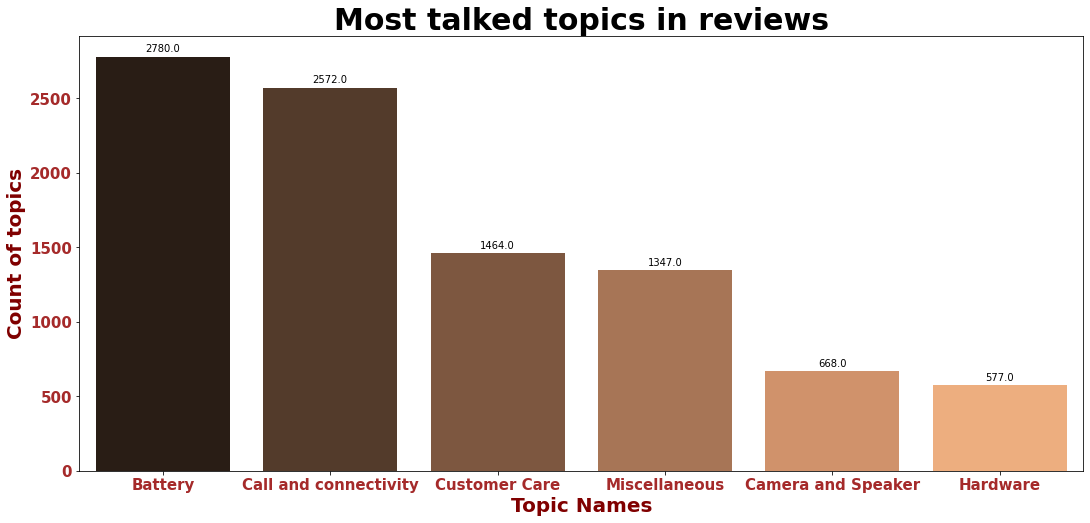

In [182]:
#Visualisation
plt.figure(figsize=(18,8))
ax = sns.barplot(x=df.TopicName.value_counts()[:6].index,y=df.TopicName.value_counts()[:6].values, palette = 'copper')
# Labeling each bar
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
# Labelling 
plt.xticks(size=15, weight = 'bold', color = 'brown')
plt.yticks(size=15, weight = 'bold', color = 'brown')
plt.xlabel('Topic Names',size=20, weight = 'bold', color = 'maroon')
plt.ylabel('Count of topics',size=20, weight = 'bold', color = 'maroon')
plt.title('Most talked topics in reviews',size=30, weight = 'bold')
plt.show()



## **Observations:**
- Most reviews were about Batteries. Followed by Call and connectivity.


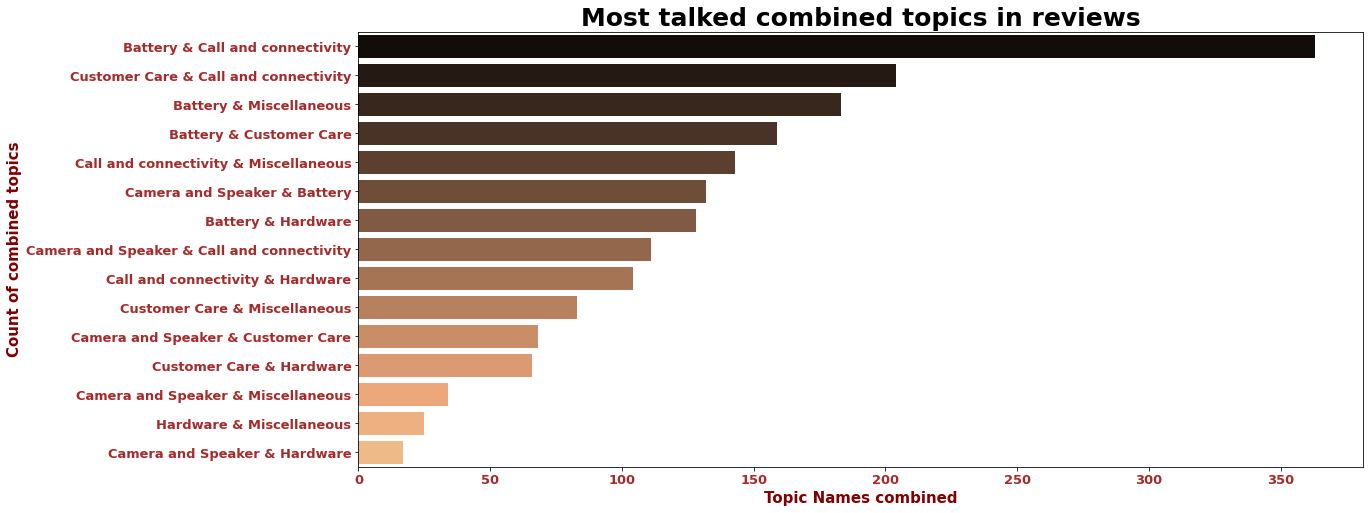

In [183]:
plt.figure(figsize=(18,8))
ax = sns.barplot(y=df.TopicName.value_counts()[6:].index,x=df.TopicName.value_counts()[6:].values, palette = 'copper')
plt.xticks(size=13, weight = 'bold', color = 'brown')
plt.yticks(size=13, weight = 'bold', color = 'brown')
plt.xlabel('Topic Names combined',size=15, weight = 'bold', color = 'maroon')
plt.ylabel('Count of combined topics',size=15, weight = 'bold', color = 'maroon')
plt.title('Most talked combined topics in reviews',size=25, weight = 'bold')

plt.show();

### **Observations:**
- From above graph we can say that most of customers had combined issues with,
  - Battery & Call and Connectivity
  - Customer Care & Call and Connectivity
  - Battery & Miscellaneous

